<a href="https://colab.research.google.com/github/liouviaglou/UXi/blob/master/NFs_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:
!pip install -U -q PyDrive

import os
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

pd.set_option("display.max_rows", 2000)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

download_path = os.path.expanduser('~/data')

try:
  os.makedirs(download_path)
except FileExistsError:
  pass

output_file = os.path.join(download_path, 'forrester.csv')
temp_file = drive.CreateFile({'id': '1v9cCdltfhRAPh3kuj8onx8mxwwnmO1hw'})
temp_file.GetContentFile(output_file)

data = pd.read_csv(output_file)
data.dtypes

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


respid                                    int64
WEIGHT                                  float64
d2                                        int64
hidagemodels                              int64
qxcurrentxmodel                           int64
hbrand                                    int64
hmodelquota                               int64
qxtime                                    int64
qxoverallxqualityxindicators_1            int64
qxoverallxqualityxindicators_2            int64
qxoverallxqualityxindicators_3            int64
qxoverallxqualityxindicators_4            int64
qxactivitiesximportance_1                 int64
qxactivitiesximportance_2                 int64
qxactivitiesximportance_3                 int64
qxactivitiesximportance_4                 int64
qxactivitiesximportance_5                 int64
qxactivitiesximportance_6                 int64
qxactivitiesximportance_7                 int64
qxactivitiesximportance_8                 int64
qxactivitiesximportance_9               

# Pair Plot

In [0]:
import seaborn as sns

columns = [
  'qxcurrentxmodel'
]

df1 = data.filter(columns)
df2 = data.filter(like='qxdrivers_')

df = pd.concat([df1, df2], axis=1, sort=False)
df['qxdrivers_1'] = df['qxdrivers_1'].astype('category')

sns.pairplot(df, kind="scatter", hue="qxcurrentxmodel", palette="husl")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


# Correlation Matrix

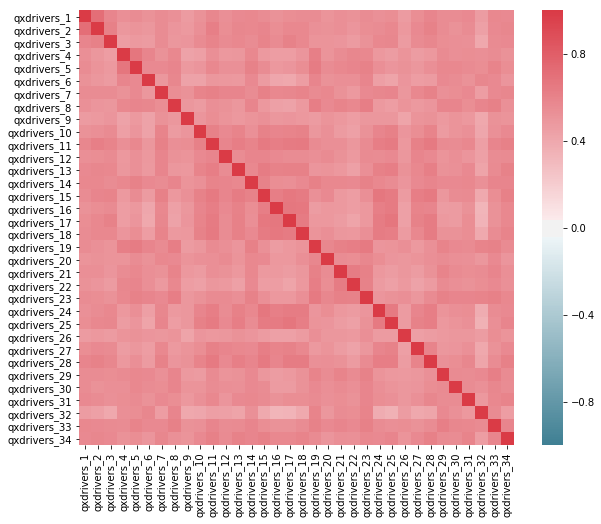

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

columns = [
  'qxcurrentxmodel'
]

df1 = data.filter(columns)
df2 = data.filter(like='qxdrivers_')

df = pd.concat([df1, df2], axis=1, sort=False)

f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin=-1, vmax=1)